In [2]:
import cv2
import os
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import normalize
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
image_directory='D://Projects//Brain Tumor Detection using Gradio//Brain MRI Images for Brain Tumor Detection Dataset//'

no_tumor_images=os.listdir(image_directory+ '/no')
yes_tumor_images=os.listdir(image_directory+ '/yes')
dataset=[]
label=[]

INPUT_SIZE=64

In [4]:
print(no_tumor_images)
print(yes_tumor_images)

['1 no.jpeg', '10 no.jpg', '11 no.jpg', '12 no.jpg', '13 no.jpg', '14 no.jpg', '15 no.jpg', '17 no.jpg', '18 no.jpg', '19 no.jpg', '2 no.jpeg', '20 no.jpg', '21 no.jpg', '22 no.jpg', '23 no.jpg', '24 no.jpg', '25 no.jpg', '26 no.jpg', '27 no.jpg', '28 no.jpg', '29 no.jpg', '3 no.jpg', '30 no.jpg', '31 no.jpg', '32 no.jpg', '33 no.jpg', '34 no.jpg', '35 no.jpg', '36 no.jpg', '37 no.jpg', '38 no.jpg', '39 no.jpg', '4 no.jpg', '40 no.jpg', '41 no.jpg', '42 no.jpg', '43 no.jpg', '44no.jpg', '45 no.jpg', '46 no.jpg', '47 no.jpg', '48 no.jpeg', '49 no.jpg', '5 no.jpg', '50 no.jpg', '6 no.jpg', '7 no.jpg', '8 no.jpg', '9 no.jpg', 'N1.JPG', 'N11.jpg', 'N15.jpg', 'N16.jpg', 'N17.jpg', 'N19.JPG', 'N2.JPG', 'N20.JPG', 'N21.jpg', 'N22.JPG', 'N26.JPG', 'N3.jpg', 'N5.jpg', 'N6.jpg', 'no 1.jpg', 'no 10.jpg', 'no 100.jpg', 'no 2.jpg', 'no 3.jpg', 'no 4.jpg', 'no 5.jpeg', 'no 6.jpg', 'no 7.jpeg', 'no 8.jpg', 'no 89.jpg', 'no 9.png', 'no 90.jpg', 'no 91.jpeg', 'no 92.jpg', 'no 923.jpg', 'no 94.jpg', 'no

In [5]:
for i , image_name in enumerate(no_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'no/'+image_name)
        image=Image.fromarray(image,'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

for i , image_name in enumerate(yes_tumor_images):
    if(image_name.split('.')[1]=='jpg'):
        image=cv2.imread(image_directory+'yes/'+image_name)
        image=Image.fromarray(image, 'RGB')
        image=image.resize((INPUT_SIZE,INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [6]:
dataset=np.array(dataset)
label=np.array(label)

In [7]:
x_train, x_test, y_train, y_test=train_test_split(dataset, label, test_size=0.2, random_state=0)

# Reshape = (n, image_width, image_height, n_channel)

# print(x_train.shape)
# print(y_train.shape)

# print(x_test.shape)
# print(y_test.shape)

x_train=normalize(x_train, axis=1)
x_test=normalize(x_test, axis=1)

y_train=to_categorical(y_train , num_classes=2)
y_test=to_categorical(y_test , num_classes=2)


In [8]:
# Model Building
# 64,64,3

model=Sequential()

model.add(Conv2D(32, (3,3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))



Epoch 1/10


9/9 [==============================] - 2s 71ms/step - loss: 0.6827 - accuracy: 0.5882 - val_loss: 0.6441 - val_accuracy: 0.4857
Epoch 2/10
9/9 [==============================] - 0s 32ms/step - loss: 0.6395 - accuracy: 0.5882 - val_loss: 0.5585 - val_accuracy: 0.8000
Epoch 3/10
9/9 [==============================] - 0s 33ms/step - loss: 0.5645 - accuracy: 0.7353 - val_loss: 0.4930 - val_accuracy: 0.8000
Epoch 4/10
9/9 [==============================] - 0s 30ms/step - loss: 0.5613 - accuracy: 0.7426 - val_loss: 0.4716 - val_accuracy: 0.8286
Epoch 5/10
9/9 [==============================] - 0s 30ms/step - loss: 0.4934 - accuracy: 0.7868 - val_loss: 0.4674 - val_accuracy: 0.8000
Epoch 6/10
9/9 [==============================] - 0s 31ms/step - loss: 0.5041 - accuracy: 0.7426 - val_loss: 0.4399 - val_accuracy: 0.8000
Epoch 7/10
9/9 [==============================] - 0s 35ms/step - loss: 0.4920 - accuracy: 0.7794 - val_loss: 0.4229 - val_accuracy: 0.8286
Epoch 8/10
9/9 [========

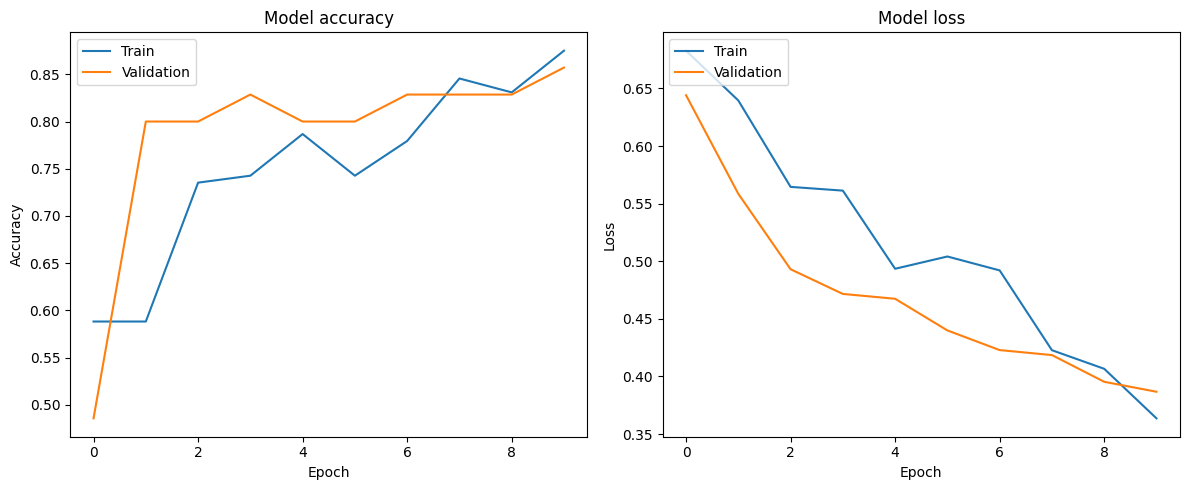

c:\Users\Vasanth Kumar C\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
# Binary CrossEntropy= 1, sigmoid
# Categorical Cross Entryopy= 2 , softmax

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, 
                    batch_size=16, 
                    verbose=1, 
                    epochs=10, 
                    validation_data=(x_test, y_test),
                    shuffle=False)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


model.save('D://Projects//Brain Tumor Detection using Gradio//BrainTumor10EpochsCategorical.h5')